In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
x_train = np.loadtxt('train_X.csv', delimiter = ',').T
y_train = np.loadtxt('train_label.csv', delimiter = ',').T

x_test = np.loadtxt('test_X.csv', delimiter = ',').T
y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [6]:
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (784, 1000)
y_train: (10, 1000)
X_test: (784, 350)
y_test: (10, 350)


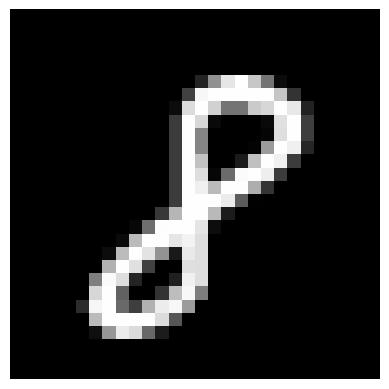

In [7]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:,index].reshape((28,28)), cmap='gray')
plt.axis('off')
plt.show()

In [8]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    ExpX = np.exp(x)
    Res = ExpX/np.sum(ExpX, axis=0)
    return Res

In [9]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x),2))

def derivative_relu(x):
    return np.array(x>0 , dtype=np.float32)

In [10]:
def init_params(nx, nh1, nh2, ny):
    w1 = np.random.randn(nh1, nx)*0.01
    b1 = np.zeros((nh1,1))

    w2 = np.random.randn(nh2, nh1)*0.01
    b2 = np.zeros((nh2,1))

    w3 = np.random.randn(ny, nh2)*0.01
    b3 = np.zeros((ny,1))

    params = {
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2,
        'w3':w3,
        'b3':b3
    }
    return params

In [11]:
def forward_prop(x,params):
    w1 = params['w1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']
    w3 = params['w3']
    b3 = params['b3']

    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2,a1) + b2
    a2 = relu(z2)

    z3 = np.dot(w3,a2) + b3
    a3 = softmax(z3)

    neurons = {
        'a1':a1,
        'z1':z1,
        'a2':a2,
        'z2':z2,
        'a3':a3,
        'z3':z3
    }
    return neurons

In [12]:
def cost(a2, y):
    m = y.shape[1]
    # Cost = -(1/m)*np.sum(np.sum(y*np.log(a2,0),1))
    Cost = -(1/m)*np.sum(y*np.log(a2))
    return Cost

In [13]:
def back_prop(x, y, params, neurons):
    m = x.shape[1]
    
    w3 = params['w3']
    b3 = params['b3']
    w2 = params['w2']
    b2 = params['b2']
    w1 = params['w1']
    b1 = params['b1']

    a3 = neurons['a3']
    a2 = neurons['a2']
    a1 = neurons['a1']
    z3 = neurons['z3']
    z2 = neurons['z2']
    z1 = neurons['z1']

    dZ3 = (a3 - y)
    dW3 = (1/m)*np.dot(dZ3,a2.T)
    dB3 = (1/m)*np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = np.dot(w3.T,dZ3)*derivative_relu(z2)
    dW2 = (1/m)*np.dot(dZ2,a1.T)
    dB2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(w2.T,dZ2)*derivative_tanh(z1)
    dW1 = (1/m)*np.dot(dZ1,x.T)
    dB1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW3':dW3,
        'dB3':dB3,
        'dW2':dW2,
        'dB2':dB2,
        'dW1':dW1,
        'dB1':dB1,
    }
    return gradients

In [14]:
def update_params(params, gradients, learning_rate):
    w3 = params['w3']
    b3 = params['b3']
    w2 = params['w2']
    b2 = params['b2']
    w1 = params['w1']
    b1 = params['b1']

    dW3 = gradients['dW3']
    dB3 = gradients['dB3']
    dW2 = gradients['dW2']
    dB2 = gradients['dB2']
    dW1 = gradients['dW1']
    dB1 = gradients['dB1']

    w3 = w3 - learning_rate*dW3
    b3 = b3 - learning_rate*dB3
    w2 = w2 - learning_rate*dW2
    b2 = b2 - learning_rate*dB2
    w1 = w1 - learning_rate*dW1
    b1 = b1 - learning_rate*dB1

    Parameters = {
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2,
        'w3':w3,
        'b3':b3
    }
    return Parameters

In [15]:
def Accuracy(x, y, params):
    Cache = forward_prop(x,params)
    Pred = Cache['a3']
    Pred = np.argmax(Pred,0)
    y = np.argmax(y,0)

    acc = np.mean(Pred == y)
    return acc

In [16]:
def model(x, y, nh1, nh2, learning_rate, iterations):
    nx = x.shape[0]
    ny = y.shape[0]

    Params = init_params(nx,nh1,nh2,ny)
    costlist = []

    for i in range(iterations):
        Neurons = forward_prop(x, Params)
        Cost = cost(Neurons['a3'],y)
        Grads = back_prop(x, y, Params, Neurons)
        Params = update_params(Params, Grads, learning_rate)

        if i%(iterations/10) == 0:
            print("Epoch:",i," - Cost:",Cost," - Accuracy:",Accuracy(x_train,y_train,Params))
        costlist.append(Cost)

    return Params,costlist

In [17]:
nh1 = 1024
nh2 = 512
lr = 0.02
itrs = 200

Params, costs = model(x_train,y_train,nh1,nh2,lr,itrs)

Epoch: 0  - Cost: 2.3023117547522562  - Accuracy: 0.175
Epoch: 20  - Cost: 1.956561846103678  - Accuracy: 0.689
Epoch: 40  - Cost: 1.3888044628328542  - Accuracy: 0.788
Epoch: 60  - Cost: 0.8605901228310016  - Accuracy: 0.914
Epoch: 80  - Cost: 0.537884807225096  - Accuracy: 0.968
Epoch: 100  - Cost: 0.35915345101125057  - Accuracy: 0.978
Epoch: 120  - Cost: 0.2565119564999239  - Accuracy: 0.983
Epoch: 140  - Cost: 0.19419054612477357  - Accuracy: 0.988
Epoch: 160  - Cost: 0.15451446806830912  - Accuracy: 0.989
Epoch: 180  - Cost: 0.1267120831593164  - Accuracy: 0.99


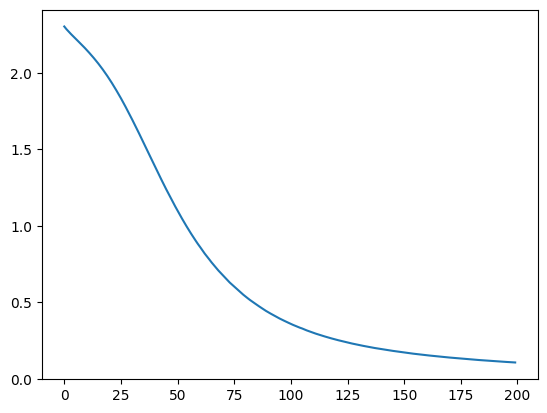

In [18]:
plt.figure()
t = np.arange(itrs)
plt.plot(t,costs)
plt.show()

In [19]:
acc1 = Accuracy(x_train,y_train,Params)
acc2 = Accuracy(x_test,y_test,Params)
print(acc1)
print(acc2)

0.992
0.8628571428571429
